In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexandrehsd/Predicting-Pulsar-Stars/master/pulsar_stars.csv")
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
df.shape

(17898, 9)

In [4]:
# view the column names of the dataframe

col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [5]:
# remove leading spaces from column names

df.columns = df.columns.str.strip()

In [6]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We can see that the leading spaces are removed from the column name. But the column names are very long. So, I will make them short by renaming them.

In [7]:
# rename column names

df.columns = ['IPMean', 'IPSd', 'IPKurtosis', 'IPSkewness', 
              'DM_SN_Mean', 'DM_SNR_Sd', 'DM_SNR_Kurtosis', 'DM_SNR_Skewness', 'target_class']

In [8]:
# view the renamed column names

df.columns

Index(['IPMean', 'IPSd', 'IPKurtosis', 'IPSkewness', 'DM_SN_Mean', 'DM_SNR_Sd',
       'DM_SNR_Kurtosis', 'DM_SNR_Skewness', 'target_class'],
      dtype='object')

We can see that the column names are shortened. IP stands for integrated profile and DM-SNR stands for delta modulation and signal to noise ratio. Now, it is much more easy to work with the columns

Our target variable is the target_class column. So, I will check its distribution.

In [9]:
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [10]:
# view the percentage distribution of target_class column

df['target_class'].value_counts()/np.float64(len(df))

0    0.908426
1    0.091574
Name: target_class, dtype: float64

We can see that percentage of observations of the class label 0 and 1 is 90.84% and 9.16%. So, this is a class imbalanced problem. I will deal with that in later section.

In [11]:
# check for missing values in variables

df.isnull().sum()

IPMean             0
IPSd               0
IPKurtosis         0
IPSkewness         0
DM_SN_Mean         0
DM_SNR_Sd          0
DM_SNR_Kurtosis    0
DM_SNR_Skewness    0
target_class       0
dtype: int64

### Summary of numerical variables

1. There are 9 numerical variables in the dataset.
2. 8 are continuous variables and 1 is discrete variable.
3. The discrete variable is target_class variable. It is also the target variable.
4. There are no missing values in the dataset.

### Outliers in numerical variables

In [12]:
# view summary statistics in numerical variables

#round(df.describe(),2)
df.describe()

,IPMean,IPSd,IPKurtosis,IPSkewness,DM_SN_Mean,DM_SNR_Sd,DM_SNR_Kurtosis,DM_SNR_Skewness,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


On closer inspection, we can suspect that all the continuous variables may contain outliers.

I will draw boxplots to visualise outliers in the above variables.

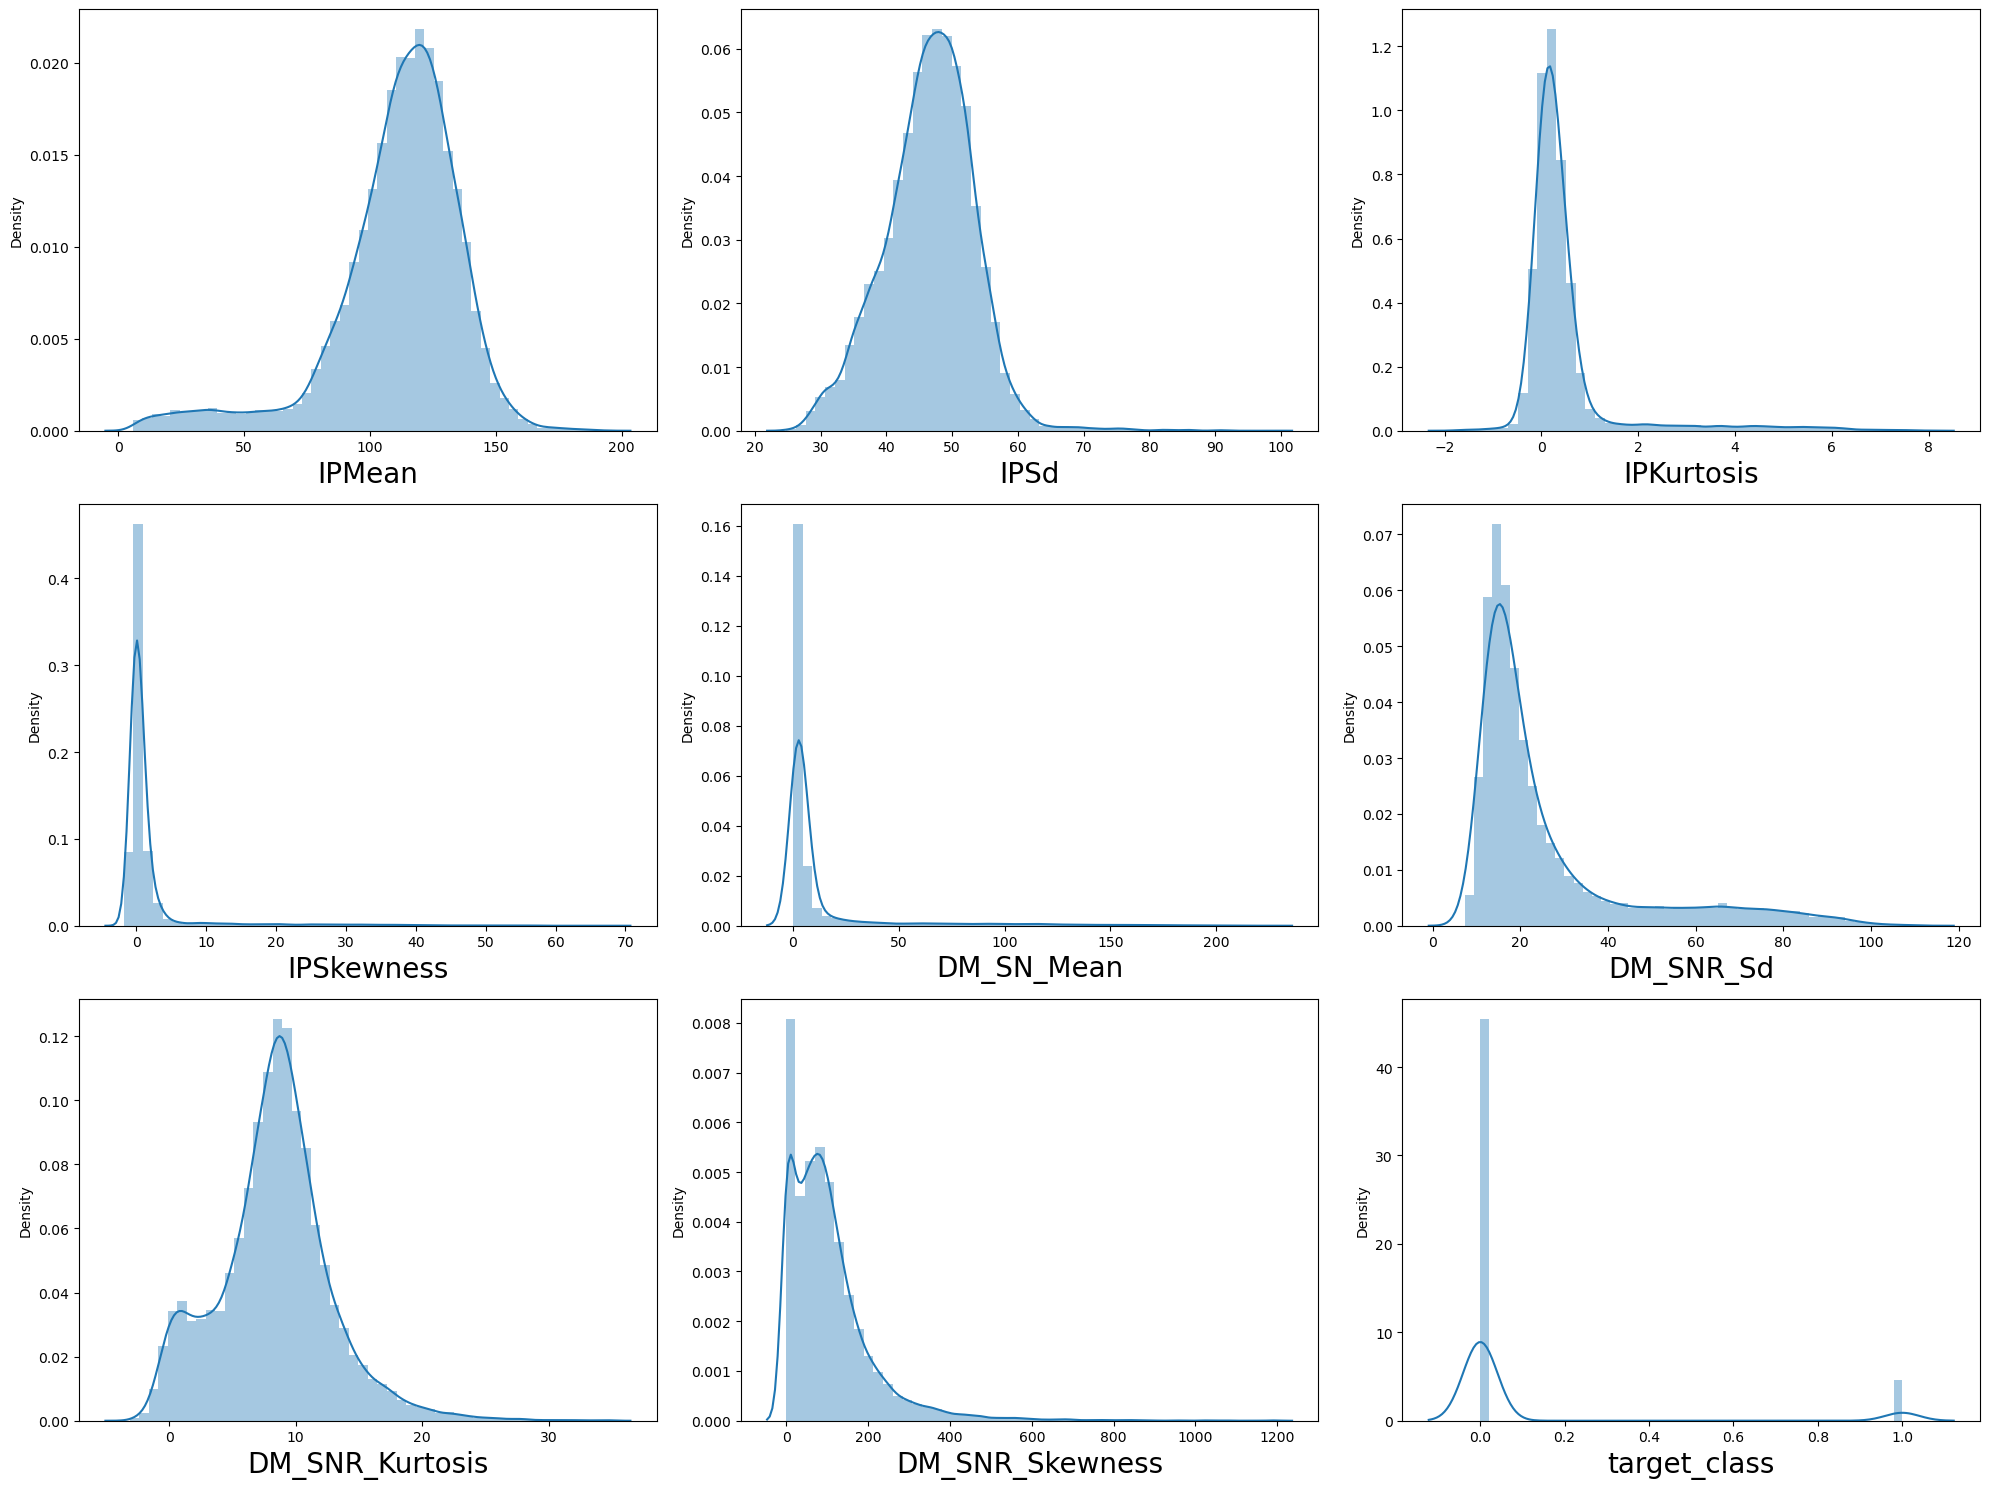

In [13]:
# Distribution plot
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

### Checking the Outliers

Text(0, 0.5, 'DM_SNR_Skewness')

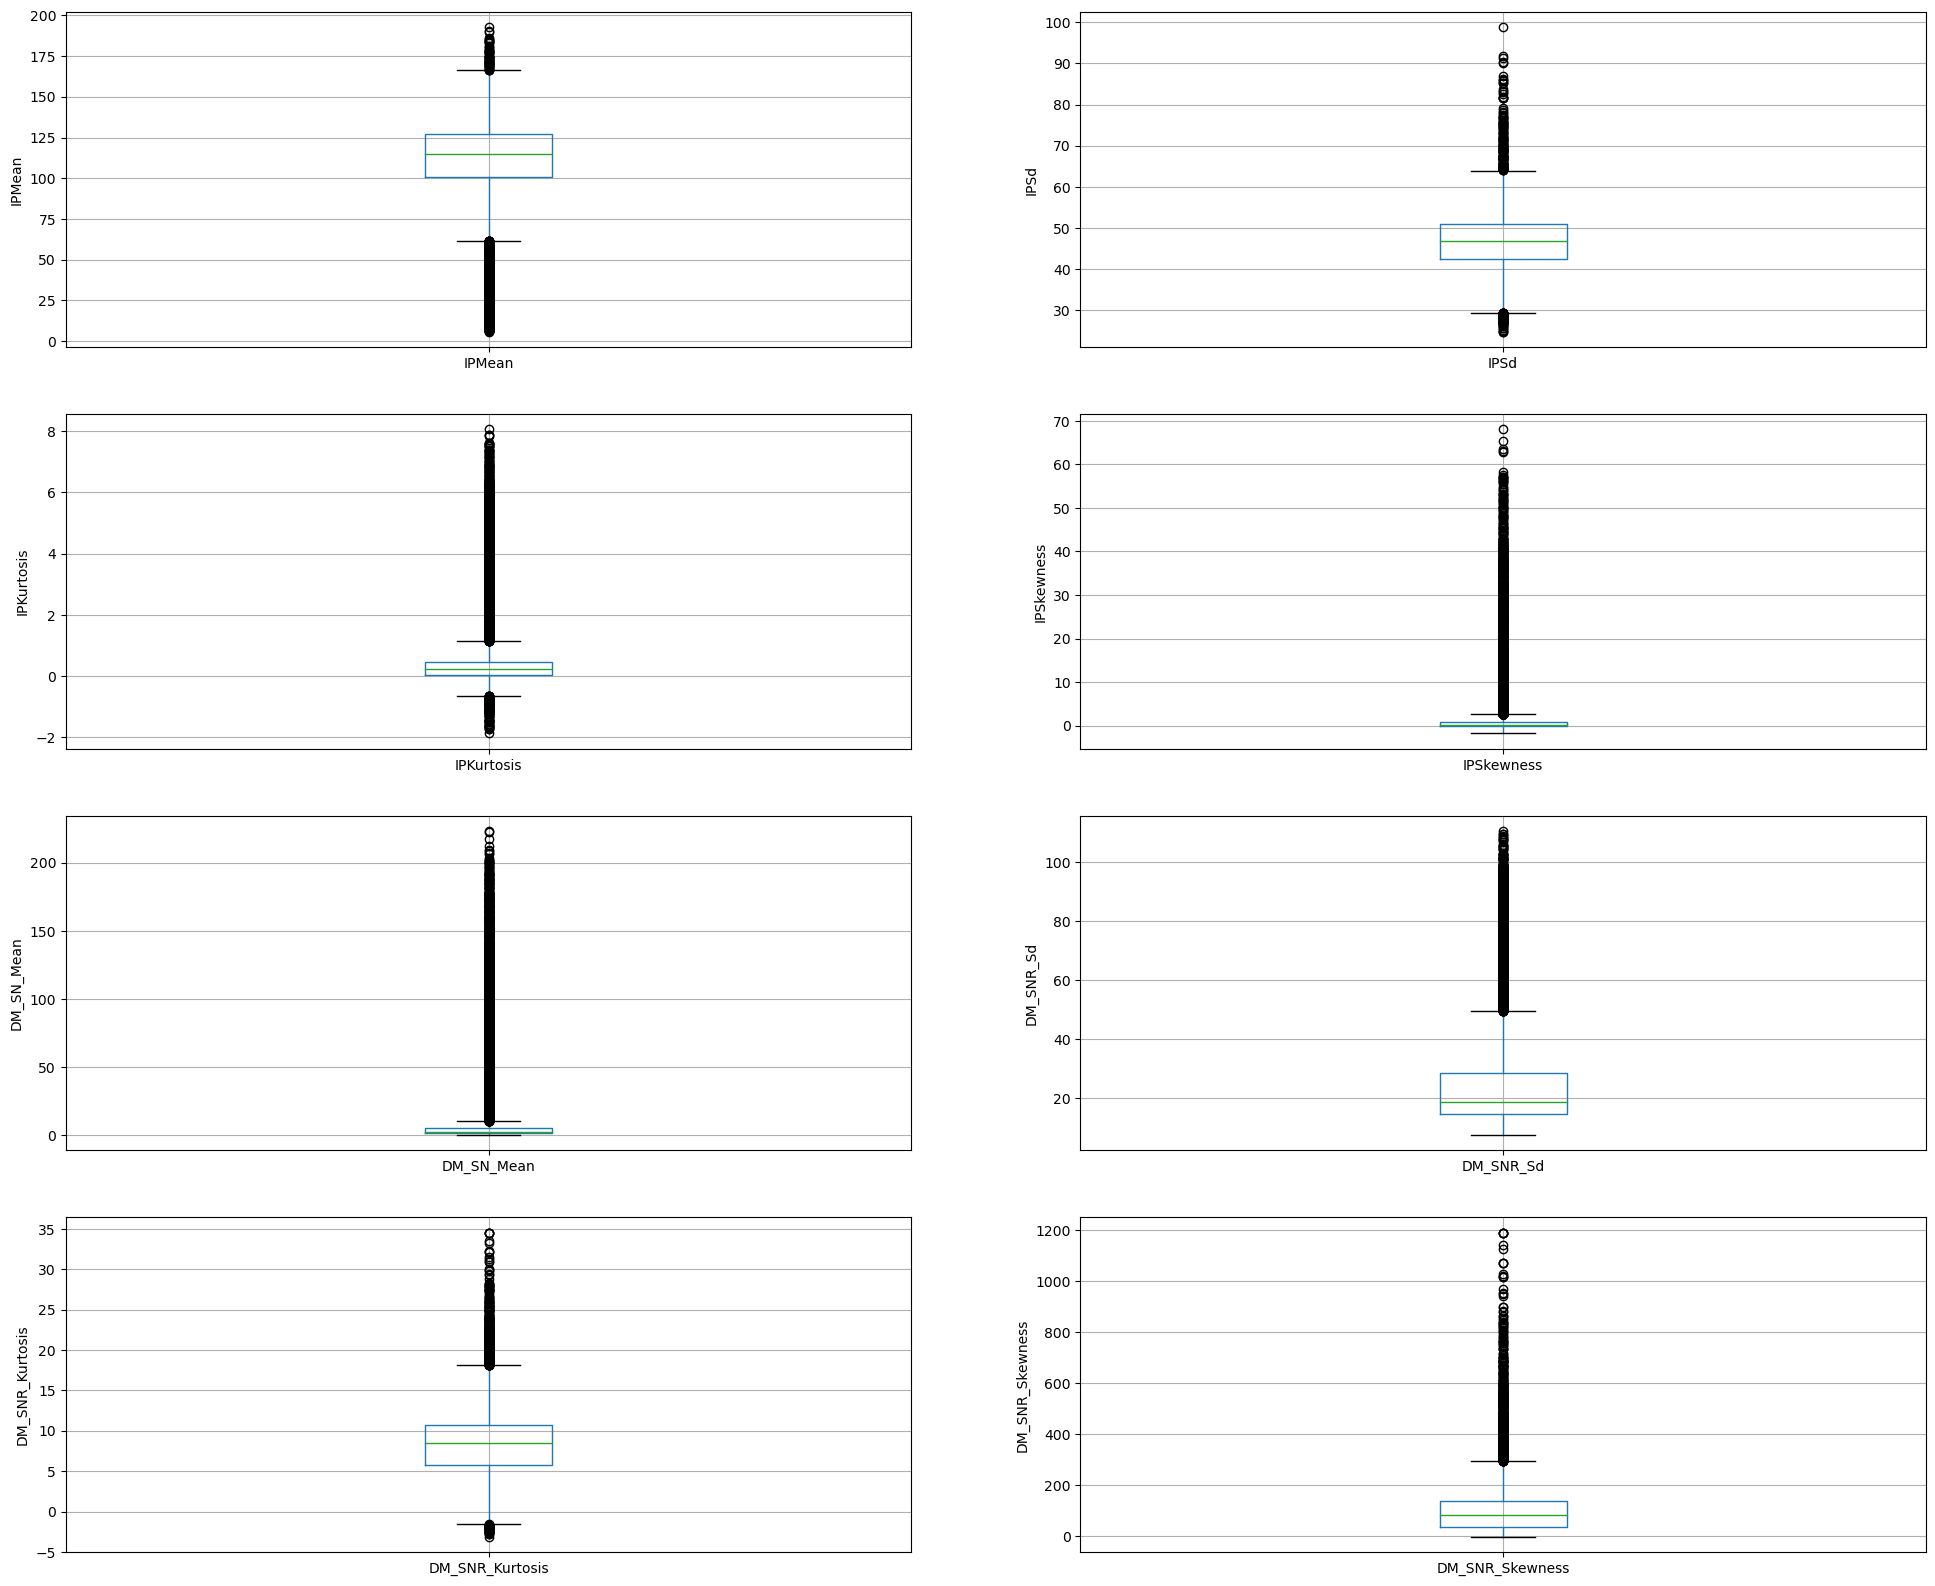

In [14]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IPMean')
fig.set_title('')
fig.set_ylabel('IPMean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IPSd')
fig.set_title('')
fig.set_ylabel('IPSd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IPKurtosis')
fig.set_title('')
fig.set_ylabel('IPKurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IPSkewness')
fig.set_title('')
fig.set_ylabel('IPSkewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM_SN_Mean')
fig.set_title('')
fig.set_ylabel('DM_SN_Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM_SNR_Sd')
fig.set_title('')
fig.set_ylabel('DM_SNR_Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM_SNR_Kurtosis')
fig.set_title('')
fig.set_ylabel('DM_SNR_Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM_SNR_Skewness')
fig.set_title('')
fig.set_ylabel('DM_SNR_Skewness')

### Now let's check the relationship

In [15]:
x=df.drop(columns=['target_class'])
y=df.target_class

In [16]:
x

,IPMean,IPSd,IPKurtosis,IPSkewness,DM_SN_Mean,DM_SNR_Sd,DM_SNR_Kurtosis,DM_SNR_Skewness
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [17]:
y

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: target_class, Length: 17898, dtype: int64

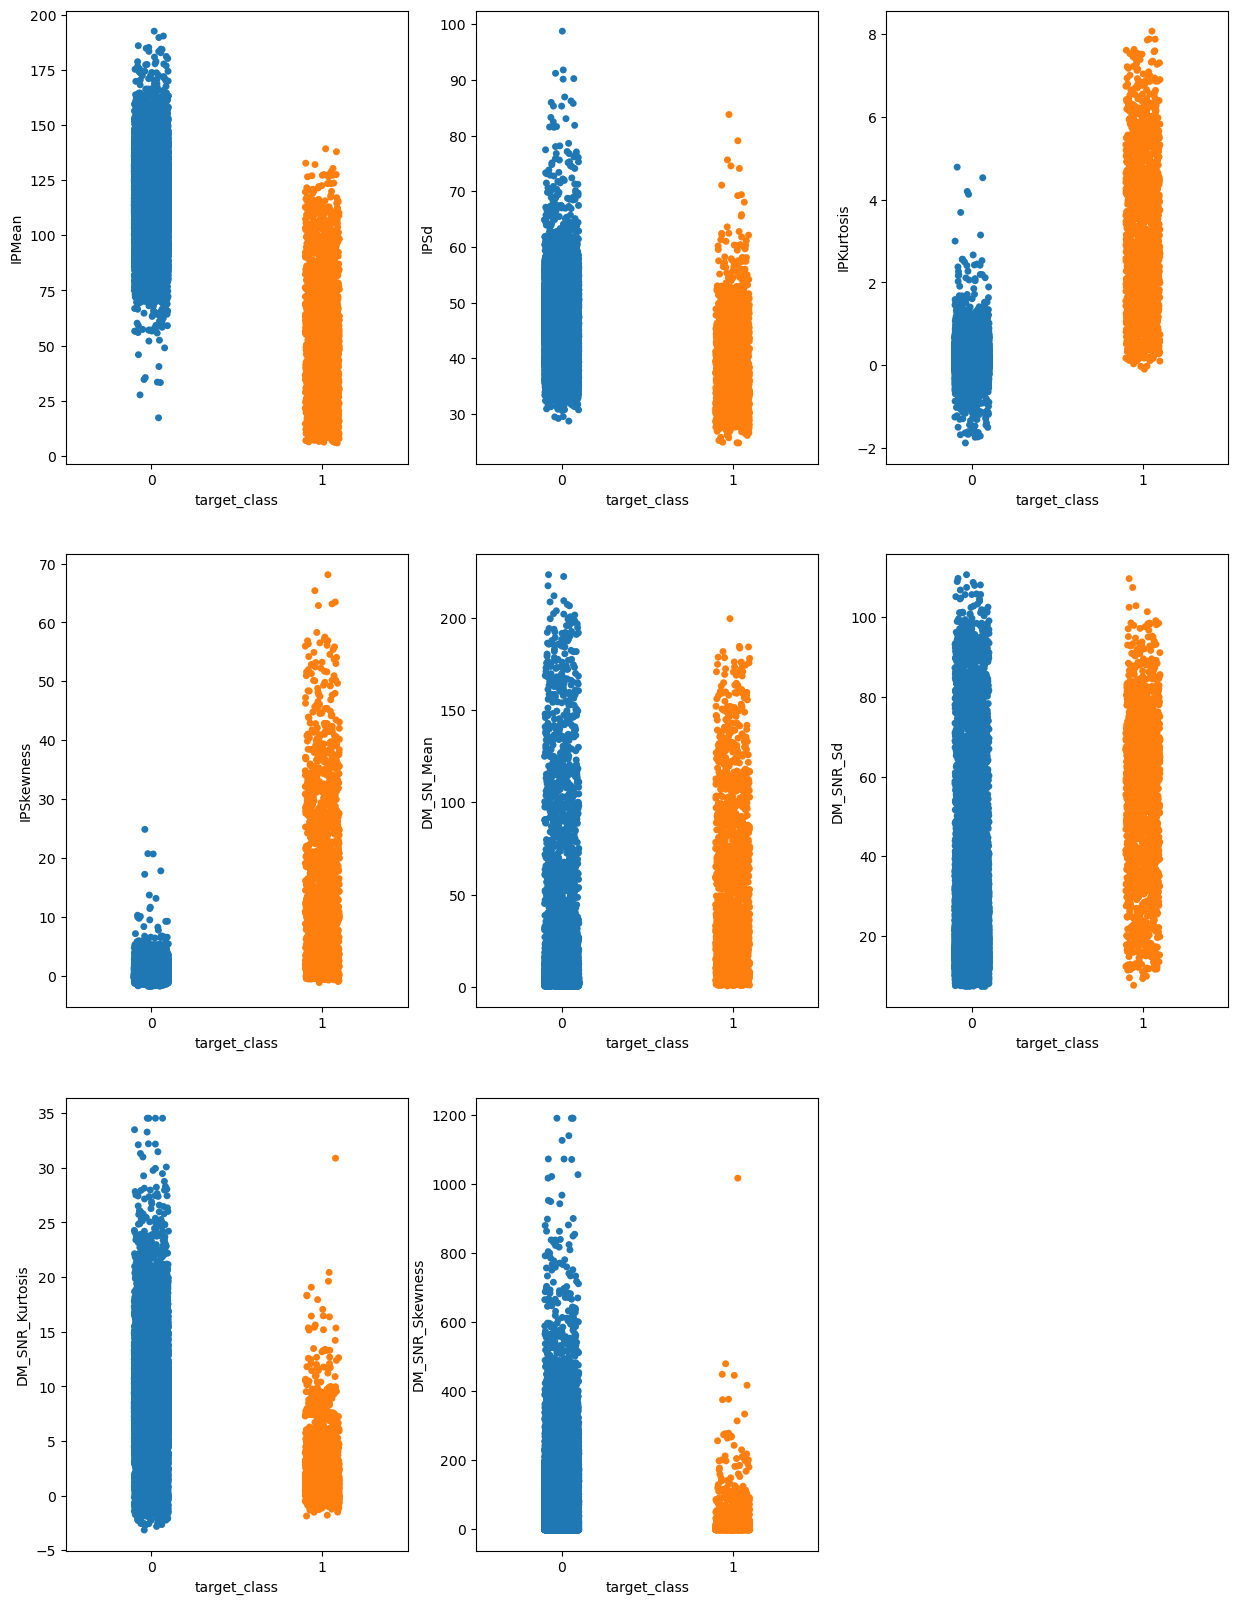

In [18]:
#Lets see how feature are related to class
plt.figure(figsize=(15,20))
plotnumber = 1
for column in x:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=x[column])
    plotnumber +=1
plt.show()

### Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
x = scaler.fit_transform(x)

### Split data into separate training and test set 

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [23]:
x_train.shape

(13423, 8)

### Model training

In [24]:
from sklearn.svm import SVC

svc = SVC()

In [25]:
svc.fit(x_train, y_train)

SVC()

In [26]:
y_pred = svc.predict(x_test)
print(y_pred)

[0 1 0 ... 0 0 0]


In [27]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9785


### Run SVM with rbf kernel and C=100.0

We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [28]:
svc = SVC(C=100)

In [29]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [30]:
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9810


We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers.

Now, I will further increase the value of C=1000.0 and check accuracy.

### Run SVM with rbf kernel and C=1000.0

In [31]:
svc = SVC(C=1000)

In [32]:
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [33]:
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9799


In this case, we can see that the accuracy had decreased with C=1000.0

### Run SVM with linear kernel 

#### Run SVM with linear kernel and C=1.0

In [34]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(x_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9785


#### Run SVM with linear kernel and C=100.0

In [35]:
# instantiate classifier with linear kernel and C=100.0
linear_svc=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc.fit(x_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=100.0 : 0.9783


#### Run SVM with linear kernel and C=1000.0 

In [36]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc.fit(x_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1000.0 : 0.9785


### Check for overfitting and underfitting

In [37]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(x_test, y_test)))

Training set score: 0.9797
Test set score: 0.9785


The training-set accuracy score is 0.9783 while the test-set accuracy to be 0.9830. These two values are quite comparable. So, there is no question of overfitting.

### Run SVM with polynomial kernel

#### Run SVM with polynomial kernel and C=1.0

In [38]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(x_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9779


#### Run SVM with polynomial kernel and C=100.0

In [39]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc.fit(x_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100.0 : 0.9797


#### Run SVM with polynomial kernel and C=1000.0

In [40]:
# instantiate classifier with polynomial kernel and C=1000.0
poly_svc=SVC(kernel='poly', C=1000.0) 


# fit classifier to training set
poly_svc.fit(x_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1000.0 : 0.9799


### Run SVM with sigmoid kernel 

#### Run SVM with sigmoid kernel and C=1.0

In [41]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(x_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8753


#### Run SVM with sigmoid kernel and C=100.0

In [42]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc.fit(x_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(x_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8751


We get maximum accuracy with rbf and linear kernel with C=100.0. and the accuracy is 0.9810. Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, this is not true. Here, we have an imbalanced dataset. The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.

So, we must explore alternative metrices that provide better guidance in selecting models. In particular, we would like to know the underlying distribution of values and the type of errors our classifer is making.

One such metric to analyze the model performance in imbalanced classes problem is Confusion matrix.

### Confusion matrix 

In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4051   19]
 [  77  328]]

True Positives(TP) =  4051

True Negatives(TN) =  328

False Positives(FP) =  19

False Negatives(FN) =  77


<AxesSubplot:>

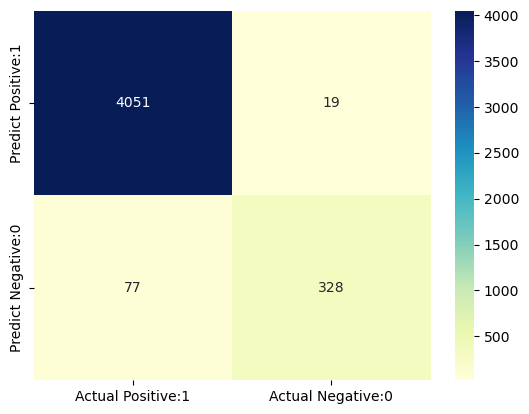

In [44]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification metrices

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4070
           1       0.95      0.81      0.87       405

    accuracy                           0.98      4475
   macro avg       0.96      0.90      0.93      4475
weighted avg       0.98      0.98      0.98      4475



#### Classification accuracy

In [46]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [47]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9785


#### Classification error 

In [48]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0215


#### Precision

In [49]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9953


#### Recall

In [50]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9813


#### Specificity

In [51]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9452


### ROC - AUC

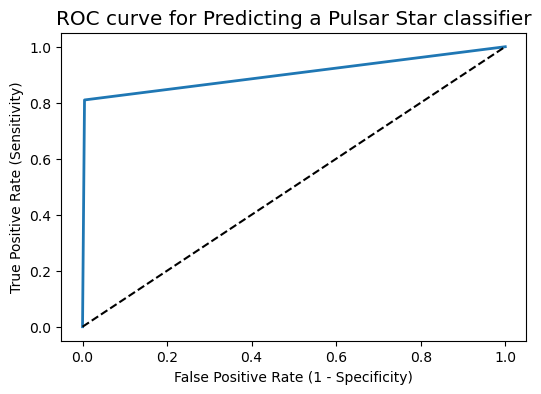

In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [53]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9026


In [54]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, x_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9762


### Stratified k-Fold Cross Validation with shuffle split with linear kernel

In [55]:
from sklearn.model_selection import KFold

kfold=KFold(n_splits=5, shuffle=True, random_state=42)
linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, x, y, cv=kfold)

In [56]:
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.97877095 0.97765363 0.97988827 0.9782062  0.98072087]


In [57]:
print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9790


### Stratified k-Fold Cross Validation with shuffle split with rbf kernel

In [58]:
rbf_svc=SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, x, y, cv=kfold)

In [59]:
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.97960894 0.97709497 0.97905028 0.97764739 0.97904443]


In [60]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9785


I obtain higher average stratified k-fold cross-validation score of 0.9790 with linear kernel but the model accuracy is 0.9785. So, stratified cross-validation technique does not help to improve the model performance.

### Hyperparameter Optimization using GridSearch CV

In [61]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [62]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9805


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.3)


In [63]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV score on test set: 0.9815


Our original model test accuracy is 0.9832 while GridSearch CV score on test-set is 0.9785.

So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model.